# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [1]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [2]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'east'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [3]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [4]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: north
step 2 - action: north
step 3 - action: east
step 4 - action: north
step 5 - action: suck
step 6 - action: east
step 7 - action: east
step 8 - action: south
step 9 - action: north
step 10 - action: suck
step 11 - action: suck
step 12 - action: suck
step 13 - action: east
step 14 - action: east
step 15 - action: south
step 16 - action: south
step 17 - action: suck
step 18 - action: north
step 19 - action: suck


7

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environmnt for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.

In [5]:
import numpy as np
#print out the environment
def print_environment(environment):
    print(np.matrix(environment))

In [6]:
# Your code and description goes here
def get_sensors(environment, botX, botY):
    dimensions = len(environment)
    sides = {"north" : False, "south" : False, "west" : False, "east" : False}
    if botY == 0:
        sides['west'] = True
    if botX == 0:
        sides['north'] = True
    if botY == dimensions-1:
        sides['east'] = True
    if botX == dimensions-1:
        sides['south'] = True
    return sides

def check_clean(environment):
    dimensions = len(environment)
    for i in range(dimensions):
        for j in range(dimensions):
            if environment[i][j] == 'dirty':
                return False
    return True


def environment(agent, steps, verbose = False, dimensions = 5):
    #if steps is -1 it should run until the room is clean rather than the steps are reached
    movements = {'north': {'x': -1, 'y': 0}, 'south': {'x': 1, 'y': 0}, 'east': {'x': 0, 'y': 1}, 'west': {'x': 0, 'y': -1}}
    env = [ ['clean']*dimensions for i in range(dimensions)]
    #assign dirt
    for i in range(dimensions):
        for j in range(dimensions):
            if np.random.rand() < .2:
                env[i][j] = 'dirty'

    #place vacuum
    botX = np.random.randint(dimensions)
    botY = np.random.randint(dimensions)
    underTheBot = env[botX][botY]
    env[botX][botY] = 'bot'

    #do all steps for bot
    if verbose:
        print('initial')
        print_environment(env)
        print()

    count = 0
    if steps == -1:
        while True:
            walls = get_sensors(env, botX, botY)
            dirt = False
            if underTheBot == 'dirty':
                dirt = True
            move = agent(walls, dirt)
            if move == 'suck':
                underTheBot = 'clean'
            else:
                if walls[move] is False:
                    env[botX][botY] = underTheBot
                    botX += movements[move]['x']
                    botY += movements[move]['y']
                    underTheBot = env[botX][botY]
                    env[botX][botY] = 'bot'
            if check_clean(env):
                if verbose:
                    print('cleaned in', i, 'steps')
                break
            if verbose:
                print_environment(env)
                print()
            count += 1
        return count

    for i in range(steps):
        walls = get_sensors(env, botX, botY)
        dirt = False
        if underTheBot == 'dirty':
            dirt = True
        move = agent(walls, dirt)
        if move == 'suck':
            underTheBot = 'clean'
        else:
            if walls[move] is False:
                env[botX][botY] = underTheBot
                botX += movements[move]['x']
                botY += movements[move]['y']
                underTheBot = env[botX][botY]
                env[botX][botY] = 'bot'
        if check_clean(env):
            if verbose:
                print('cleaned in', i, 'steps')
            break
        if verbose:
            print_environment(env)
            print()
        count += 1

    if verbose:
        print('after')
        print_environment(env)
    return count, check_clean(env)


environment(simple_randomized_agent, 500)

(68, True)

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [7]:
# Your code and description goes here
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return 'suck'
    open = []
    for key, value in bumpers.items():
        if value is False:
            open.append(key)
    return np.random.choice(open)

environment(simple_reflex_agent, 500)

(56, True)

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [8]:
# Your short description of the state and your implementation goes here
# I used the kind we talked about by first navigating to the north-west corner and weaving up and down from there
# Global variables remember if I have started my weaving pattern or if I am still heading to the north-west corner and after that which direction I am currently weaving

In [9]:
# Your code goes here
started = False
heading = 'south'
# seen_corner = False

def model_based_agent(bumpers, dirty):
    global started
    global heading
    #always clean if dirty
    if dirty:
        return 'suck'

    #navigate towards the northwest corner
    if not started and not bumpers['north']:
        return 'north'

    if not started and not bumpers['west']:
        return 'west'

    if not started and bumpers['north'] and bumpers['west']:
        started = True
        return 'south'

    #start the weaving pattern
    if bumpers[heading]:
        heading = 'north' if heading == 'south' else 'south'
        return 'east'

    else:
        return heading
environment(model_based_agent, 500)

(27, True)

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

random five: 287
random ten: 2545
random hundred: 0

reflex five: 100
reflex ten: 939
reflex hundred: 0

model five: 24
model ten: 121
model hundred: 12091



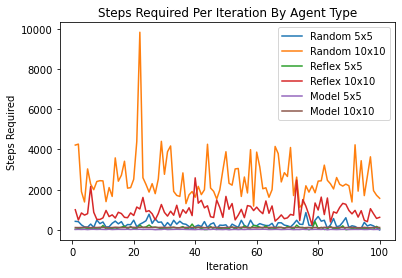

In [10]:
# Your code goes here
# I commented out the ones that would make this run all night... again
import matplotlib.pyplot as plt
random_five = 0
random_five_arr = []
random_ten = 0
random_ten_arr = []
random_hundred = 0
random_hundred_arr = []

reflex_five = 0
reflex_five_arr = []
reflex_ten = 0
reflex_ten_arr = []
reflex_hundred = 0
reflex_hundred_arr = []

model_five = 0
model_five_arr = []
model_ten = 0
model_ten_arr = []
model_hundred = 0
model_hundred_arr = []


for i in range(100):
    # Add to random totals
    tmp = environment(simple_randomized_agent, -1)
    random_five += tmp
    random_five_arr.append(tmp)
    tmp = environment(simple_randomized_agent, -1, False, 10)
    random_ten += tmp
    random_ten_arr.append(tmp)
    # tmp = environment(simple_randomized_agent, -1, False, 100)
    # random_hundred += tmp
    # random_hundred_arr.append(tmp)

    # Add to reflex totals
    tmp = environment(simple_reflex_agent, -1)
    reflex_five += tmp
    reflex_five_arr.append(tmp)
    tmp = environment(simple_reflex_agent, -1, False, 10)
    reflex_ten += tmp
    reflex_ten_arr.append(tmp)
    # tmp = environment(simple_reflex_agent, -1, False, 100)
    # reflex_hundred += tmp
    # reflex_hundred_arr.append(tmp)

    # Add to model totals
    heading = 'south'
    started = False
    tmp = environment(model_based_agent, -1)
    model_five += tmp
    model_five_arr.append(tmp)

    heading = 'south'
    started = False
    tmp = environment(model_based_agent, -1, False, 10)
    model_ten += tmp
    model_ten_arr.append(tmp)

    heading = 'south'
    started = False
    tmp = environment(model_based_agent, -1, False, 100)
    model_hundred += tmp
    model_hundred_arr.append(tmp)



random_five = int(random_five/100)
random_ten = int(random_ten/100)
random_hundred = int(random_hundred/100)

print('random five:', random_five)
print('random ten:', random_ten)
print('random hundred:', random_hundred)
print()

reflex_five = int(reflex_five/100)
reflex_ten = int(reflex_ten/100)
reflex_hundred = int(reflex_hundred/10)

print('reflex five:', reflex_five)
print('reflex ten:', reflex_ten)
print('reflex hundred:', reflex_hundred)
print()

model_five = int(model_five/100)
model_ten = int(model_ten/100)
model_hundred = int(model_hundred/100)

print('model five:', model_five)
print('model ten:', model_ten)
print('model hundred:', model_hundred)
print()

def show_graph(extra = ''):
    x_pos = range(1,101)
    global random_five_arr
    global random_ten_arr
    # global random_hundred_arr

    global reflex_five_arr
    global reflex_ten_arr
    # global reflex_hundred_arr

    global model_five_arr
    global model_ten_arr
    global model_hundred_arr

    plt.plot(x_pos, random_five_arr, label = "Random 5x5")
    plt.plot(x_pos, random_ten_arr, label = "Random 10x10")
    if extra == 'random':
        plt.plot(x_pos, random_hundred_arr, label = "Random 100x100")

    plt.plot(x_pos, reflex_five_arr, label = "Reflex 5x5")
    plt.plot(x_pos, reflex_ten_arr, label = "Reflex 10x10")
    if extra == 'reflex':
        plt.plot(x_pos, reflex_hundred_arr, label = "Reflex 100x100")

    plt.plot(x_pos, model_five_arr, label = "Model 5x5")
    plt.plot(x_pos, model_ten_arr, label = "Model 10x10")
    if extra == 'model':
        plt.plot(x_pos, model_hundred_arr, label = "Model 100x100")

    plt.xlabel('Iteration')
    plt.ylabel('Steps Required')
    plt.title('Steps Required Per Iteration By Agent Type')

    plt.legend()
    plt.show()

show_graph()

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 299              | 2518                | 875493                   |
| 10x10   | 112              | 982                 | 317621                   |
| 100x100 | 25               | 120                 | 12096                    |

Add charts to compare the performance of the different agents.

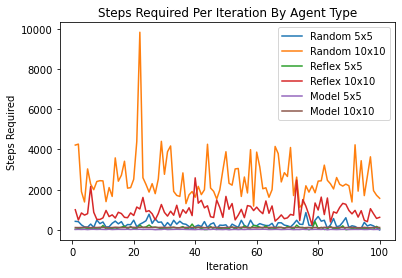

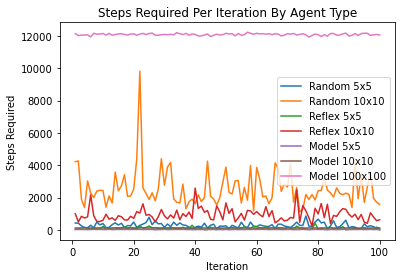

In [11]:
# Your graphs and discussion of the results goes here
# I have my graph output adjusted to omit the 100x100 as they make the graph harder to read the other values because they are so much less
# However, the other 100x100s are fastest for the model, then the reflext, and extremely slow for the random agent. I ran the simulation overnight to get the number in the table above, but the 
#    number illustrate how much slower the random is than the reflex and the reflex is already significantly slwoer than the model
show_graph()
#I will also shoe the graph with the last model (100x100) since it still finishes in a reasonable amount of time compared to the reflex and random, it just makes it harder to visualize the results
show_graph('model')

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [12]:
# Answer goes here
# if it is put into a rectangular room with unknown size:
# my bot will be able to clean this room in the expected amount of steps being (in an m x n room) mn * 1.2 plus a little to get to the starting position for the model agent. 
# This agent is consistent in this cleaning quantity and will always finish cleaning this room. The reflex is second fastest and does not have the guarantee of finishing; it also does not have a
# consistent quantity of solution steps. The attributes of the reflex bot also apply to the random bot, however it is far less efficient.

# if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms):
# my model based agent would remain the fastest so long as it was allowed some modifications to understand the new possible movements. 
# With a hallway, this would mean recognizing new spaces and routing through them accordingly. My two other agents, reflex and random, would see similar efficiency (so long as the bot had an equal
# chance at randomly happening into the hallway or new rooms as it did for just cleaning a single room, and this might not be the case with a narrow hallway the bot would have to find) and need no 
# modification.

# if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors):
# my reflex and random agents would require no modification. They might be slowed down if the obstacles block or make areas harder to reach and this could slow the efficiency of these already not very
# efficient bots would still, however, be able to finish the room. My model based implementation, however, would require some modification. if there was a corner shaped obstacle, it could trick the
# bot into thinking it had navigated to its starting position even if it hadn't yet. This would cause a premature start and the remaining left side of the room would stay dirty. in addition to this,
# the bot would inevitably hit some obstacles and think it had reached the top or bottom of the room and turn around, leaving the other side of the obstacle dirty.
# To solve this, I would need to implement some form of room mapping where the robot learns about where it is and if the obstacle was truly at the top or bottom of the room and if not, learn to go around it.

## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [13]:
# Your code and discussion goes here
def get_obstacle_sensors(environment, botX, botY):
    dimensions = len(environment)
    sides = {"north" : False, "south" : False, "west" : False, "east" : False}
    if botY == 0 or environment[botX][botY-1] == 'wall':
        sides['west'] = True
    if botX == 0 or environment[botX-1][botY] == 'wall':
        sides['north'] = True
    if botY == dimensions-1 or environment[botX][botY+1] == 'wall':
        sides['east'] = True
    if botX == dimensions-1 or environment[botX+1][botY] == 'wall':
        sides['south'] = True
    return sides
# I am making an environment that still has a .2 chance of being dirty on some areas, but if it is not dirty, there is then a .2 chance a wall will be placed as an obstacle
# This env will return if it completed or not and if so how many steps it took to clean up
def obstacle_environment(agent, steps, verbose = False, dimensions = 5):
    movements = {'north': {'x': -1, 'y': 0}, 'south': {'x': 1, 'y': 0}, 'east': {'x': 0, 'y': 1}, 'west': {'x': 0, 'y': -1}}
    env = [ ['clean']*dimensions for i in range(dimensions)]
    #assign dirt
    for i in range(dimensions):
        for j in range(dimensions):
            if np.random.rand() < .2:
                env[i][j] = 'dirty'
            elif np.random.rand() < .2:
                env[i][j] = 'wall'

    #place vacuum
    botX = np.random.randint(dimensions)
    botY = np.random.randint(dimensions)
    underTheBot = env[botX][botY]
    env[botX][botY] = 'bot'

    #do all steps for bot
    if verbose:
        print('initial')
        print_environment(env)
        print()

    count = 0
    for i in range(steps):
        walls = get_obstacle_sensors(env, botX, botY)
        dirt = False
        if underTheBot == 'dirty':
            dirt = True
        move = agent(walls, dirt)
        if verbose:
            print(walls)
            print(move)
        if move == 'suck':
            underTheBot = 'clean'
        else:
            if walls[move] is False:
                env[botX][botY] = underTheBot
                botX += movements[move]['x']
                botY += movements[move]['y']
                underTheBot = env[botX][botY]
                env[botX][botY] = 'bot'
        if check_clean(env):
            if verbose:
                print('cleaned in', i, 'steps')
            break
        if verbose:
            print_environment(env)
            print()
        count += 1

    if verbose:
        print('after')
        print_environment(env)
    return count, check_clean(env)

print('Below is the comparison of the old obstacle-less environment and the new, obstacle-ridden environment for 5x5 and 10x10 with a max 100,000 steps (meaning it should finish unless not capable.')
print('Feel free to rerun and compare performances')
random_five_steps, random_five_done = obstacle_environment(simple_randomized_agent, 100000)
random_ten_steps, random_ten_done = obstacle_environment(simple_randomized_agent, 100000, False, 10)

reflex_five_steps, reflex_five_done = obstacle_environment(simple_reflex_agent, 100000)
reflex_ten_steps, reflex_ten_done = obstacle_environment(simple_reflex_agent, 100000, False, 10)

heading = 'south'
started = False
model_five_steps, model_five_done = obstacle_environment(model_based_agent, 100000)
heading = 'south'
started = False
model_ten_steps, model_ten_done = obstacle_environment(model_based_agent, 100000, False, 10)

print()
print('OBSTACLES: The random agent 5x5 finished in' if random_five_done else 'OBSTACLES: The random agent 5x5 failed to finish in', random_five_steps, 'steps')
random_five_steps, random_five_done = environment(simple_randomized_agent, 100000)
print('The random agent 5x5 finished in' if random_five_done else 'The random agent 5x5 failed to finish in', random_five_steps, 'steps')
print()
print('OBSTACLES: The random agent 10x10 finished in' if random_ten_done else 'OBSTACLES: The random agent 10x10 failed to finished in', random_ten_steps, 'steps')
random_ten_steps, random_ten_done = environment(simple_randomized_agent, 100000, False, 10)
print('The random agent 10x10 finished in' if random_ten_done else 'The random agent 10x10 failed to finished in', random_ten_steps, 'steps')
print()
print('OBSTACLES: The reflex agent 5x5 finished in' if reflex_five_done else 'OBSTACLES: The reflex agent 5x5 failed to finished in', reflex_five_steps, 'steps')
reflex_five_steps, reflex_five_done = environment(simple_reflex_agent, 100000)
print('The reflex agent 5x5 finished in' if reflex_five_done else 'The reflex agent 5x5 failed to finished in', reflex_five_steps, 'steps')
print()
print('OBSTACLES: The reflex agent 10x10 finished in' if reflex_ten_done else 'OBSTACLES: The reflex agent 10x10 failed to finished in', reflex_ten_steps, 'steps')
reflex_ten_steps, reflex_ten_done = environment(simple_reflex_agent, 100000, False, 10)
print('The reflex agent 10x10 finished in' if reflex_ten_done else 'The reflex agent 10x10 failed to finished in', reflex_ten_steps, 'steps')
print()
print('OBSTACLES: The model agent 5x5 finished in' if model_five_done else 'OBSTACLES: The model agent 5x5 failed to finished in', model_five_steps, 'steps')
heading = 'south'
started = False
model_five_steps, model_five_done = environment(model_based_agent, 100000)
print('The model agent 5x5 finished in' if model_five_done else 'The model agent 5x5 failed to finished in', model_five_steps, 'steps')
print()
print('OBSTACLES: The model agent 10x10 finished in' if model_ten_done else 'OBSTACLES: The model agent 10x10 failed to finished in', model_ten_steps, 'steps')
heading = 'south'
started = False
model_ten_steps, model_ten_done = environment(model_based_agent, 100000, False, 10)
print('The model agent 10x10 finished in' if model_ten_done else 'The model agent 10x10 failed to finished in', model_ten_steps, 'steps')

Below is the comparison of the old obstacle-less environment and the new, obstacle-ridden environment for 5x5 and 10x10 with a max 100,000 steps (meaning it should finish unless not capable.
Feel free to rerun and compare performances

OBSTACLES: The random agent 5x5 finished in 8 steps
The random agent 5x5 finished in 45 steps

OBSTACLES: The random agent 10x10 finished in 3036 steps
The random agent 10x10 finished in 2163 steps

OBSTACLES: The reflex agent 5x5 finished in 20 steps
The reflex agent 5x5 finished in 31 steps

OBSTACLES: The reflex agent 10x10 finished in 1911 steps
The reflex agent 10x10 finished in 1113 steps

OBSTACLES: The model agent 5x5 failed to finished in 100000 steps
The model agent 5x5 finished in 7 steps

OBSTACLES: The model agent 10x10 failed to finished in 100000 steps
The model agent 10x10 finished in 113 steps


In [14]:
# It does not say I have to code this section, so I will just say to guarantee the model solves it I would make sure it can avoid/prevent the following: 
# if there was a corner shaped obstacle, it could trick the bot into thinking it had navigated to its starting position even if it hadn't yet. this would cause a premature start and
# the remaining left side of the room would stay dirty. In addition to this, the bot would inevitably hit some obstacles and think it had reached the
# top or bottom of the room and turn around, leaving the other side of the obstacle dirty. To solve this, I would need to implement some form of room mapping where the
# robot learns about where it is and if the obstacle was truly at the top or bottom of the room and if not, learn to go around it.

# The other two would not benefit from much different without changing the actual agent type from being the random or reflex

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [15]:
# Your ideas/code

# I would run the depth first search (this could be done using a camera or something on the actual robot) then go to the nearest unclean square.
# If there are no visible unclean squares, I would ensure the entire room was visible to ensure 100% clean this may not be the most efficient,
# but it guarantees that nothing is needed to understand current location and the robot will just always be making meaningful motions towards a dirty square

# This seems really tricky, I think this would require a large amount of robot training, so it would get better at understanding when it would need to turn around
# or come back later to a particular square it decides has a high chance of getting dirty again